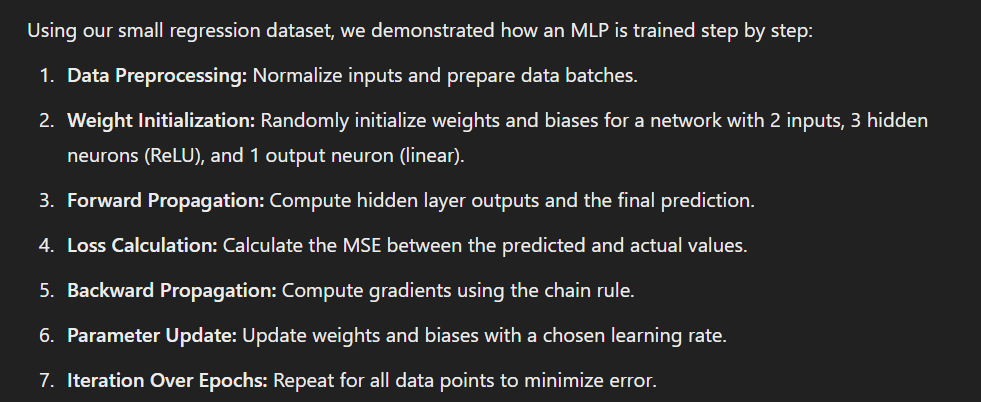

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [4]:
def initialize_parameters(layer_dims):
  '''Initializes the weights with 0.1 and biases with 0 for the neural network for given architecture'''
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):
    parameters['W' + str(l)] = np.ones(shape=(layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros(shape=(layer_dims[l], 1))

  return parameters

In [5]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [6]:
# Weighted sum with linear activation
def linear_forward(A_prev, W, b):
  Z = np.dot(W.T, A_prev) + b

  return Z

In [7]:
# Forward Propagation
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2        # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)

  return A, A_prev

In [8]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

In [9]:
y_hat = y_hat[0][0]

In [10]:
A1

array([[1.6],
       [1.6]])

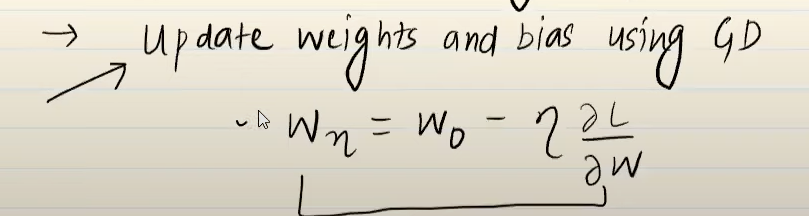

In [11]:
# Updating parameters using SGD, Applying formulas manually for gradients and parameter update
def update_parameters(parameters, y, y_hat, A1, X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [12]:
update_parameters(parameters,y,y_hat,A1,X)

In [13]:
# parameters updated from the initial values
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

#### Running for all 4 rows

In [14]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat, A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [15]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.11458955, 0.1168776 ],
        [0.11458955, 0.1168776 ]]),
 'b1': array([[0.0019667],
        [0.0019667]]),
 'W2': array([[0.12712927],
        [0.12712927]]),
 'b2': array([[0.13612818]])}

In [16]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.12409711, 0.13272353],
        [0.12412266, 0.13276611]]),
 'b1': array([[0.00355129],
        [0.00355555]]),
 'W2': array([[0.14692424],
        [0.14731907]]),
 'b2': array([[0.15810417]])}

In [17]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.13482804, 0.15847776],
        [0.1349909 , 0.15884991]]),
 'b1': array([[0.00569748],
        [0.0057292 ]]),
 'W2': array([[0.17312488],
        [0.17534027]]),
 'b2': array([[0.18773702]])}

#### epochs implementation 

In [18]:
# Parameter initialization
parameters = initialize_parameters([2, 2, 1])
epochs = 5

for i in range(epochs):
  
  Loss = []
  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # forward propagation
    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    # Save the loss for each row
    Loss.append((y-y_hat)**2)
    
    # parameter update using backpropagation
    update_parameters(parameters, y, y_hat, A1, X)

  # print average loss for each epoch
  print('Epoch - ',i+1,'Loss - ', np.array(Loss).mean())

print('\nFinal Parameters:',parameters, sep='\n')


Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729628
Epoch -  4 Loss -  3.2520938634031613
Epoch -  5 Loss -  1.3407132589299962

Final Parameters:
{'W1': array([[0.26507636, 0.38558861],
       [0.27800387, 0.40980287]]), 'b1': array([[0.02749056],
       [0.02974394]]), 'W2': array([[0.41165744],
       [0.48302736]]), 'b2': array([[0.48646246]])}


In [19]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


### Implementing in Keras

In [20]:
model = Sequential()
model.add(Dense(2, activation='linear', input_dim=2))
model.add(Dense(1, activation='linear'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Keras Randomly assigns initial weights
model.get_weights()

[array([[-0.34958237,  0.3796612 ],
        [-0.14904332, -0.38265687]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.0396283],
        [ 0.6416389]], dtype=float32),
 array([0.], dtype=float32)]

In [23]:
# Set the initial weights same as ours
new_weights = [ 
            np.array([[0.1, 0.1], [0.1, 0.1]], dtype=np.float32),
            np.array([0., 0.], dtype=np.float32),
            np.array([[0.1], [ 0.1]], dtype=np.float32),
            np.array([0.], dtype=np.float32)
            ]

model.set_weights(new_weights)

In [24]:
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [25]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [26]:
model.fit(df.iloc[:,0:-1], df['lpa'], epochs=75, verbose=1, batch_size=1)

Epoch 1/75
4/4 [==============================] - 1s 5ms/step - loss: 27.9134
Epoch 2/75
4/4 [==============================] - 0s 3ms/step - loss: 27.5947
Epoch 3/75
4/4 [==============================] - 0s 5ms/step - loss: 27.2699
Epoch 4/75
4/4 [==============================] - 0s 4ms/step - loss: 26.9130
Epoch 5/75
4/4 [==============================] - 0s 4ms/step - loss: 26.5665
Epoch 6/75
4/4 [==============================] - 0s 4ms/step - loss: 26.2100
Epoch 7/75
4/4 [==============================] - 0s 3ms/step - loss: 25.8613
Epoch 8/75
4/4 [==============================] - 0s 5ms/step - loss: 25.4765
Epoch 9/75
4/4 [==============================] - 0s 4ms/step - loss: 25.0678
Epoch 10/75
4/4 [==============================] - 0s 5ms/step - loss: 24.6554
Epoch 11/75
4/4 [==============================] - 0s 10ms/step - loss: 24.2471
Epoch 12/75
4/4 [==============================] - 0s 7ms/step - loss: 23.8392
Epoch 13/75
4/4 [==============================] - 0s 3ms/st

In [27]:
# new weights and biases for which the loss is minimum
model.get_weights()

[array([[0.37366056, 0.37366056],
        [0.3655659 , 0.3655659 ]], dtype=float32),
 array([0.27230978, 0.27230978], dtype=float32),
 array([[0.3729095],
        [0.3729095]], dtype=float32),
 array([0.20464315], dtype=float32)]